## The goal of our project is predict the weather type (Sunny, Cloudy, Rainy, Snowy)
---
## هدف مشروعنا هو توقع نوع الطقس بناءً على البيانات المتوفرة في الـ dataset.

---

### Download Dataset file - تحميل ملف البيانات

In [16]:
!curl -O https://raw.githubusercontent.com/Abdulahk1/tuwaiq_project/refs/heads/main/weather_type.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 825522 100 825522   0     0 985.1k     0  --:--:-- --:--:-- --:--:-- 984.3k


### Import Libraries — استدعاء المكتبات

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

---

### Load Dataset — قراءة البيانات

In [18]:
df_data = pd.read_csv("weather_type.csv")

---

### General Info — معلومات عامة عن البيانات

In [3]:
print("Dataset Shape:", df_data.shape)

print("\nInfo:")
df_data.info()

print("\nMissing values:")
print(df_data.isnull().sum())

Dataset Shape: (13200, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB

Missing values:
Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover

---

### Data Exploration — استكشاف البيانات (EDA)

In [4]:
# Numeric Columns Statistics

df_data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [5]:
# Categorical Value Counts

categorical_cols = ["Cloud Cover", "Season", "Location", "Weather Type"]

for col in categorical_cols:
    print("\nValue counts for:", col)
    print(df_data[col].value_counts())


Value counts for: Cloud Cover
Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

Value counts for: Season
Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

Value counts for: Location
Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

Value counts for: Weather Type
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


#### Extra EDA Added

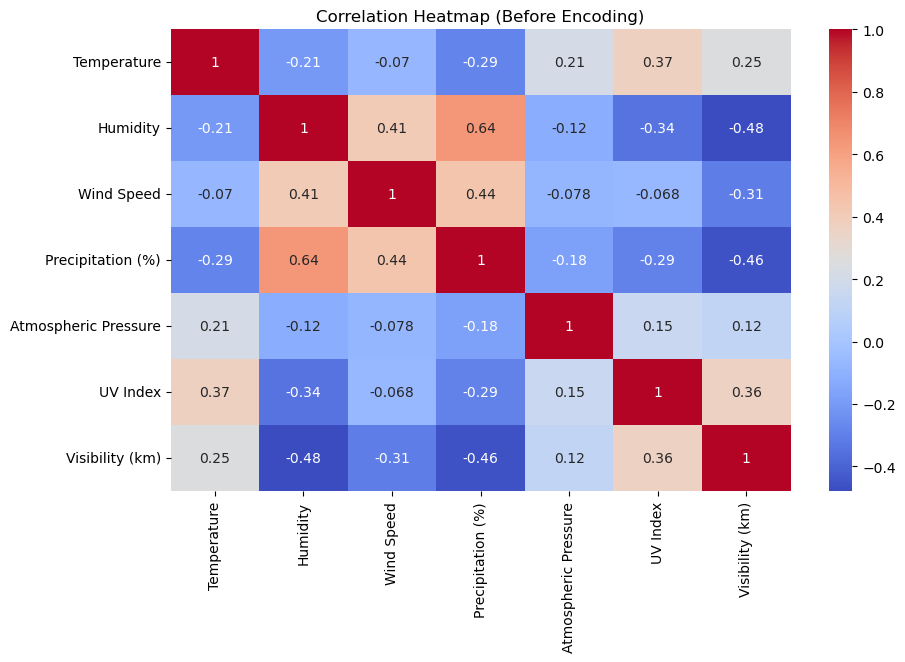

In [6]:
# Heatmap Before Encoding

plt.figure(figsize=(10,6))
sns.heatmap(df_data.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Before Encoding)")
plt.show()

---

### Data Visualization — الرسوم البيانية

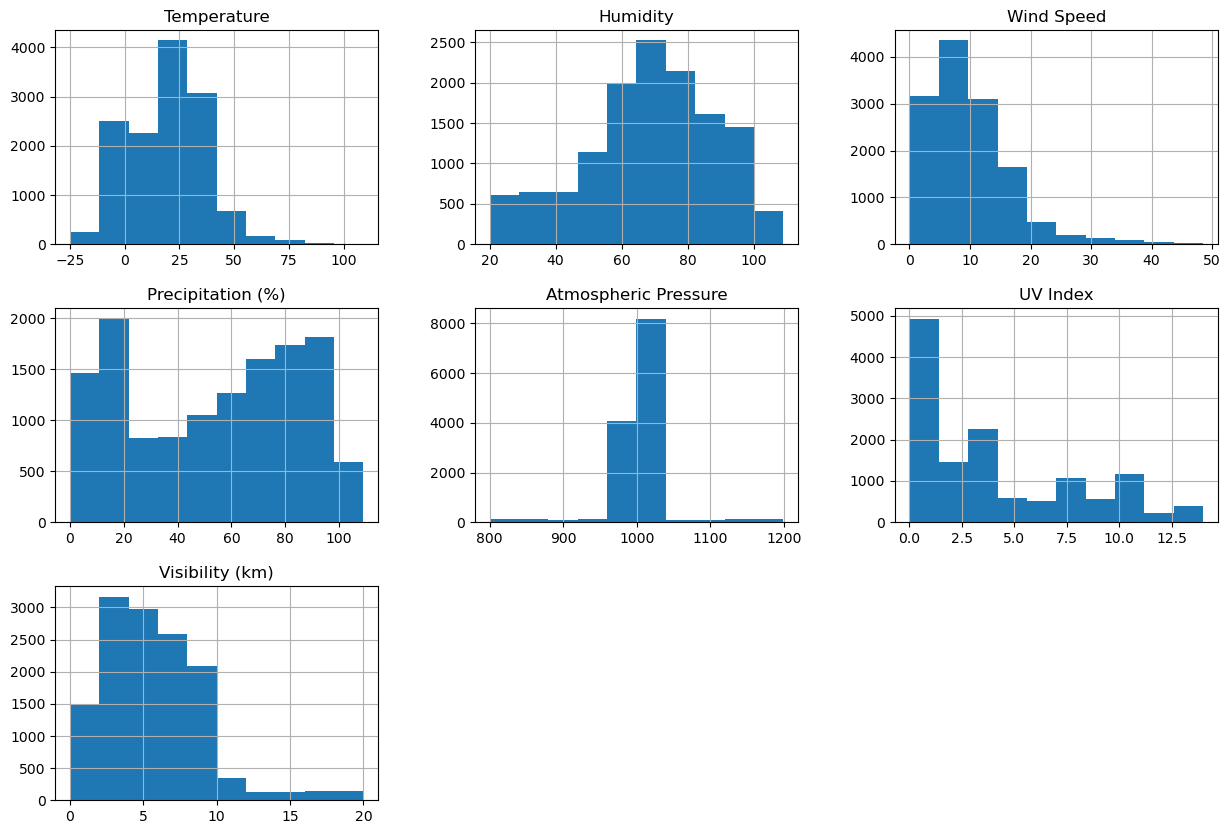

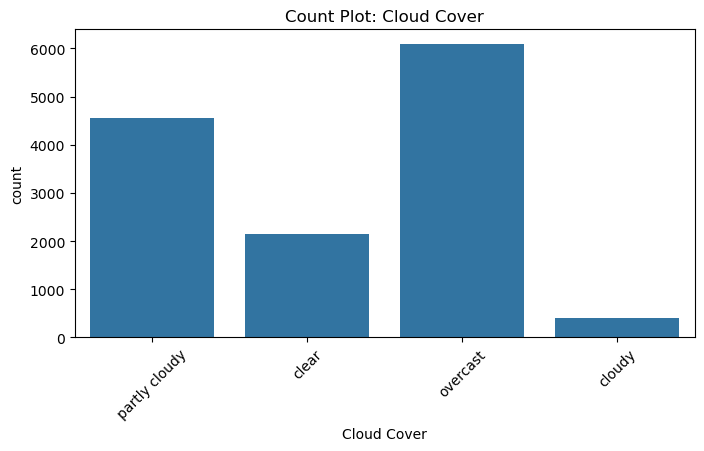

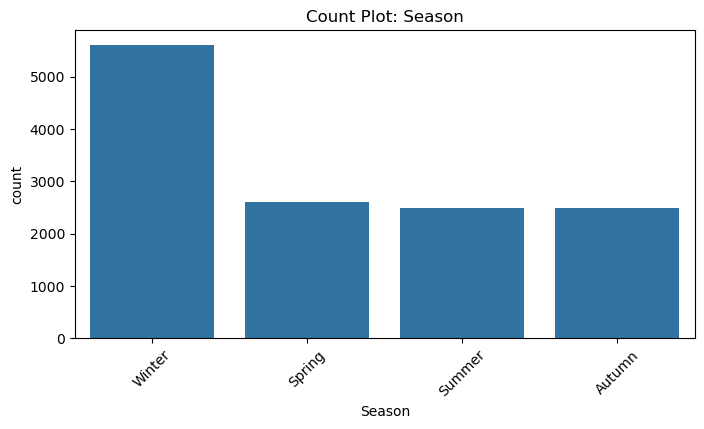

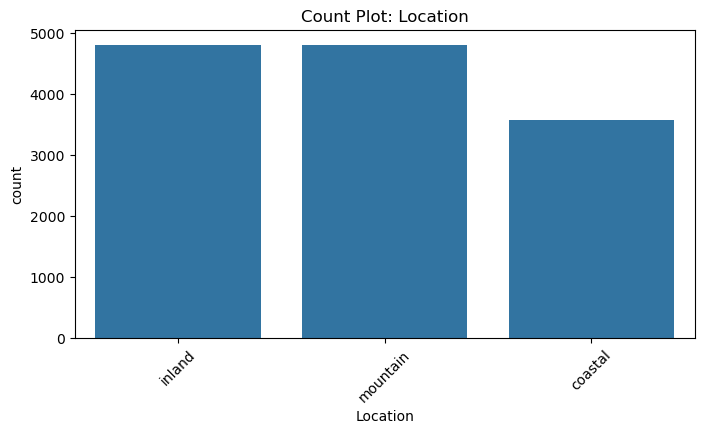

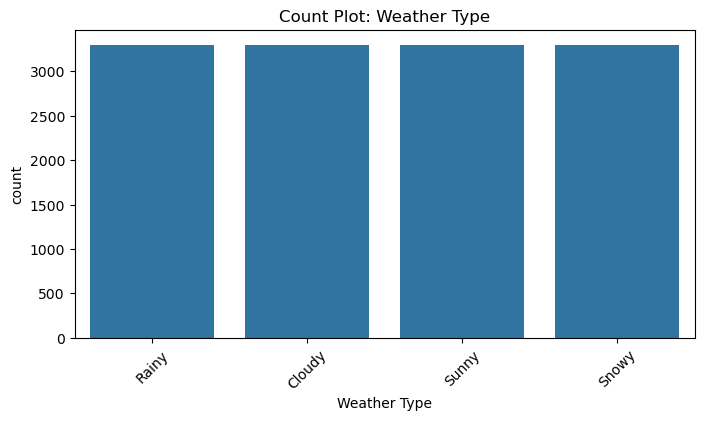

In [7]:
df_data.hist(figsize=(15, 10))
plt.show()

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_data, x=col)
    plt.title(f"Count Plot: {col}")
    plt.xticks(rotation=45)
    plt.show()

---

### Data Cleaning & Encoding — تنظيف وترميز البيانات

In [8]:
le = LabelEncoder()

df_data["Location"] = le.fit_transform(df_data["Location"])
df_data["Cloud Cover"] = le.fit_transform(df_data["Cloud Cover"])
df_data["Season"] = le.fit_transform(df_data["Season"])
df_data["Weather Type"] = le.fit_transform(df_data["Weather Type"])

df_data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


---

### Split Data — تقسيم البيانات إلى تدريب واختبار

In [9]:
x = df_data.drop("Weather Type", axis=1)
y = df_data["Weather Type"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=56
)

---

### Model Training — تدريب النموذج

In [10]:
model = DecisionTreeClassifier(max_depth=9, min_samples_split=9)
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,9
,min_samples_split,9
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


---

### Model Evaluation — تقييم النموذج

In [11]:
pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred))
print("Precision:", precision_score(y_test, pred, average='macro'))
print("Recall:", recall_score(y_test, pred, average='macro'))
print("F1 Score:", f1_score(y_test, pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

Accuracy: 0.9111111111111111
Precision: 0.912084284732307
Recall: 0.9109148916982365
F1 Score: 0.9113323440569104
Confusion Matrix:
 [[921  50  16  30]
 [ 52 856  12  32]
 [ 33  25 884  27]
 [ 41  18  16 947]]


**Extra Visualization Added (Confusion Matrix Heatmap)**

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

---

# Model Improvement — تحسين النموذج

# We chose another algorithm to test whether the model's performance would improve

## We chose a RandomForestClassifier algorithm
* No need to edit the dataset
* It has similar performance, but it may be slower than the DecisionTreeClassifier algorithm

In [12]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(max_depth = 15,max_features = 'log2',min_samples_split = 10,n_estimators = 200)
model_forest.fit(x_train, y_train)

forest_pred = model_forest.predict(x_test)

print("Accuracy:", accuracy_score(y_test, forest_pred))
print("Precision:", precision_score(y_test, forest_pred, average='macro'))
print("Recall:", recall_score(y_test, forest_pred, average='macro'))
print("F1 Score:", f1_score(y_test, forest_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, forest_pred))

Accuracy: 0.9113636363636364
Precision: 0.9114020562624845
Recall: 0.9115102600367913
F1 Score: 0.9114327743223465
Confusion Matrix:
 [[915  55  22  25]
 [ 38 864  21  29]
 [ 25  19 900  25]
 [ 39  29  24 930]]


---

### Comparison — مقارنة بين النماذج

In [13]:
print("Decision Tree Accuracy:", accuracy_score(y_test, pred))
print("Random Forest Accuracy:", accuracy_score(y_test, forest_pred))

Decision Tree Accuracy: 0.9111111111111111
Random Forest Accuracy: 0.9113636363636364


---
---

## You can see last updates from github [repo](https://github.com/Abdulahk1/tuwaiq_project)

---